# Reviewing Tables in R; Correlation v.s. Causality
## PS 3 Week 3 Sections  
<p style='text-align: right;'> Adapted from GSI Yue Lin's materials </p>




## 1. Tables

This week we saw how to create cross-tables, like the table for low-mid-high income of countries by autocracy-democracy. When creating two-way tables, however, you may have recognized the tables don't really make sense one of them is a 'continuous variable.' 

You need to have "discrete" or "categorical" variables. How do you recode them? 

With the `ifelse` function

A sample dataset built-in in R. We will use the built-in `iris` dataset in R (i.e., no need to import any dataset). 

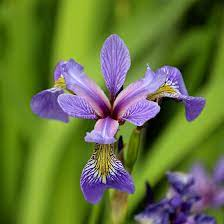

In [3]:
head(iris,10)  #this is the built-in dataset. Covers 150 observations of the iris flower.
#search "Iris setosa" "Iris virginica" "iris versicolor" on google if you're interested! 

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [4]:
#What do these all mean? How are these flower measurements different by size?
#Let's try to create a two-way table, with Petal Length and Species.
table(iris$Species,iris$Petal.Length)


            
              1 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9  3 3.3 3.5 3.6 3.7 3.8 3.9  4
  setosa      1   1   2   7  13  13   7   4   2  0   0   0   0   0   0   0  0
  versicolor  0   0   0   0   0   0   0   0   0  1   2   2   1   1   1   3  5
  virginica   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0  0
            
             4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9  5 5.1 5.2 5.3 5.4 5.5 5.6 5.7
  setosa       0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0
  versicolor   3   4   2   4   7   3   5   2   2  1   1   0   0   0   0   0   0
  virginica    0   0   0   0   1   0   0   2   3  3   7   2   2   2   3   6   3
            
             5.8 5.9  6 6.1 6.3 6.4 6.6 6.7 6.9
  setosa       0   0  0   0   0   0   0   0   0
  versicolor   0   0  0   0   0   0   0   0   0
  virginica    3   2  2   3   1   1   1   2   1

This puts out way too many categories, and it's hard to understand this. I want to change "Petal.Length" into a few discrete segments.

In [5]:
#An ideal form of data would be

c(4.9,1,1.01,5.65) #from this kind of numeric data
c("long","short","short","long") #into this type of 'categorical' or'discrete' variable

[1] 4.90 1.00 1.01 5.65

[1] "long"  "short" "short" "long"

In [ ]:
hist(iris$Petal.Length) #let's look at the distribution of the length, to determine a cutoff point.

4 seems to be a decent cutting point.

In [ ]:
iris$Petal.Length.Discrete <- ifelse(iris$Petal.Length >= 4, 1, 0)
#has the variable been generated?
#similarly, go to your lecture sandbox and try creating a 'discrete/categorical' variable yourself for happiness_data!

In [ ]:
table(iris$Petal.Length.Discrete) 

In [ ]:
table(iris$Species, iris$Petal.Length.Discrete)
# what do you observe?

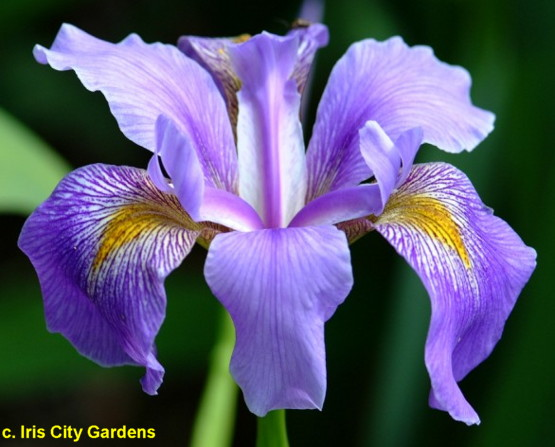
Iris Virginica: longer petals!

In [6]:
# Review: what is the average petal length of Iris Virginica? What about Setosa? Are they really different?

virginica.petal.mean <- NULL  # YOUR CODE HERE
setosa.petal.mean <- NULL  # YOUR CODE HERE

hint: you would first want to subset  `iris` based on `Species`, and then calculate the mean of the `Petal.Length` of the subsets. Repeat the process for virginica and setosa.

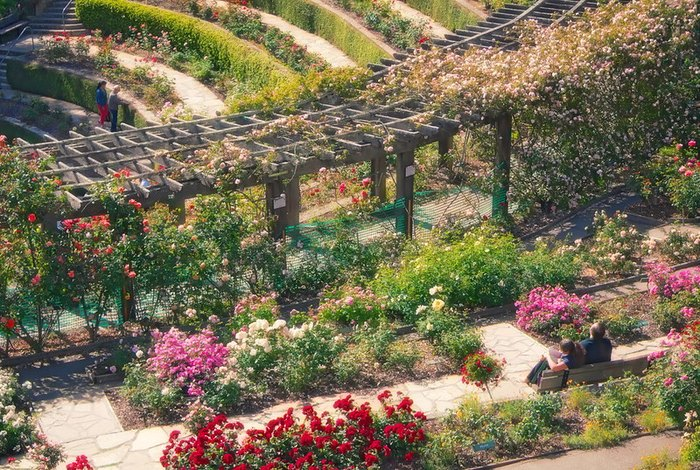

The next time you go to the Berkeley Botanical / Rose Garden...


## Other arguments to discretize variables or create subsets

So far, you have encountered `==` and `>=` operators you use when creating discrete variables or subsetting data. Are there any others?


We can get these by doing something called a Boolean comparison, where we compare a value to another, and if that condition is True, it will return `TRUE`. Here are some common comparisons:

| Logical Operator | R Code |
| - | - |
| does x equal y? | x == y |
| does x NOT equal y? | x != y |
| is x less than y? | x < y |
| is x greater than y? | x > y |
| is x less than or equal to y? | x <= y |
| is x greater than or equal to y? | x >= y |


In [ ]:
# Logical example in R
x <- 5
y <- 10

x == y
x < y

In [ ]:
#Bonus: what does the "conditional statement" in a subset function look like?
subset(iris, Species=="setosa") #like this one
iris$Species=="setosa"

In [ ]:
#or this one:
iris$Petal.Length>=4

So the second argument in R is providing a long list of "TRUE / FALSE" to subset the dataframe on! 

In [ ]:
# Let's practice using this to subset:
# subset(table, column_name <comparison> <value>)
setosa <- subset(iris, setosa == 1)
head(setosa)

In [ ]:
# Alternatively, let's use another way to subset:
setosa1 <- subset(iris, Species == 'setosa')
head(setosa1)

# Aha, 'setosa' and 'setosa1' are identical! 

## Review: Creating tables

We can use the `table` function to create one and two way tables. One and two way tables are used to summarize the counts of each category in a table. To use the `table` function, just plug in the column that we want to check.

| One way | Two way |
| - | - | 
| table(data\$var1) | table(data\\$var1, data\$var2) |

In [ ]:
# Let's see how many flowers are in each category!
table(iris$Species)

# 1.2. Debugging

Method 1. To see where the code went wrong, by running code line by line! How to run line by line? Add `#` in the front to make the code not run. Let's work with the below example, where you're supposed to find the mean `Petal.Length` of `setosa`.

In [ ]:
# RUN THIS CELL
#Run the chunk while excluding some lines 
iris2 <- subset(iris, Species=="setosa")
mean <- Mean(iris2$Petal.length)
mean 

Method 2. Check for small typos ex) capitalization, special characters, calling for dataframe vs. indexing a variable

In [ ]:
table(iris$species)

In [ ]:
subset(iris, Species==1)

In [ ]:
subset(iris, Species==setosa)





## 2. Correlation vs. Causation

[1] 0.9005516

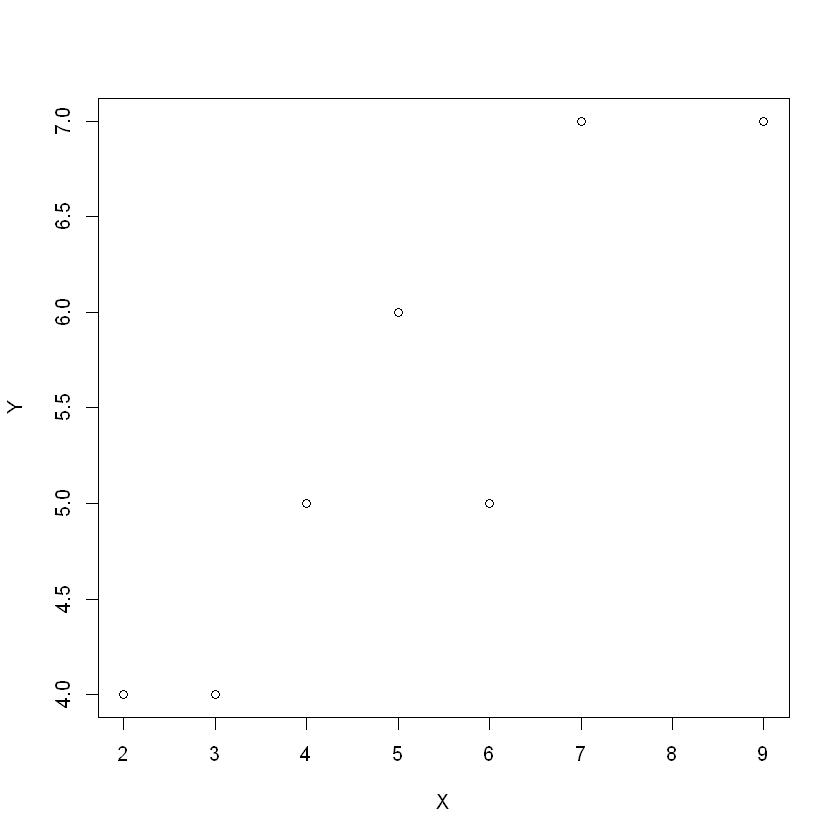

In [1]:
#Let's create an example
X <- c(5,4,7,2,9,3,6) #score of nations' democratic index
Y <- c(6,5,7,4,7,4,5) #gdp per capita 

#and create a scatterplot
plot(X,Y)

#do they seem positively correlated? 
cor(X,Y)

Correlation: Statistical relationship between two variables, whether causal or not. 
- X and Y are linearly related 

- Increase in X is associated with increase/decrease in Y

Causation: If there is a higher level of democracy, then (   )? Causation is a relationship where X causes Y. In other words, Y is the effect of X. If there is X, then there will always be Y. If X then therefore Y. If X is true, then Y must also be true. If the sun has risen, then the rooster must have crowed (not the other way around). If it has rained, then the ground will be wet. 
If there is X, it is likely that Y may be the case. However, some other factor may have caused Y. 

## Reverse Causality

When you are connecting your evidence with your argument, you should be careful to interpret your evidence in the right way. Sometimes, you may interpret A --> B when it is actually B --> A, but correlation cannot tell you the difference. 

Democracy is correlated with Higher GDP, but a higher GDP may have caused democratization. 

# Omitted Variable

A --> B may make sense, but it could also be a result of coincidence (spurious). Phone freezing and text messaging doesn't work may go hand-in-hand, but those two may be a common result of a third variable: lack of RAM. 

Globalization may have caused both free flow of information and sponsored democratic movements, and also facilitate GDP growth from trade. 

i.e.
Globalization --> Democratization

and
Globalization --> GDP +

If this variable was something the researcher had not accounted for, then "globalization" would be an omitted variable, and the claim made between democratization and globalization may be subject to **omitted variable bias**.

In other words, democratization and GDP may be correlated, but that correlation is out of pure chance--it is **spurious**. 

## Spurious correlation

Definition: a mathematical relationship in which two or more events or variables are associated but not causally related, due to coincidence, or the presence of a certain third, unseen factor (i.e., **confounding factor**), or it can just happen without any confounding variables.

Let's see some online examples here: https://www.tylervigen.com/spurious-correlations

## 3. How to Identify Causation? Experiments

Let's get back to the slides!